# PRÁCTICA 3.1 - VÍCTOR CHOZA MERINO - ADRIÁN TURIEL CHARRO

## 1. Regresión logística multi-clase

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat

In [2]:
def sigmoide(z): # g(z)
    return (1 / (1 + np.exp(-z)))

In [3]:
def gradiente(Thetas, X, Y, lambdaa):
    H = sigmoide(X @ Thetas) # Hipótesis

    return (1/len(X)) * (X.T @ (H-np.ravel(Y))) + (lambdaa/len(X)) * Thetas

In [4]:
def coste(Thetas, X, Y, lambdaa):
    H = sigmoide(X @ Thetas) # Hipótesis

    return (-1/len(X)) * (np.log(H).T @ Y + (1-np.ravel(Y)) @ np.log(1-H+1e-6)) + (lambdaa/(2*len(X))) * sum(Thetas[1:]**2)

In [5]:
def porcentaje_acertado(X, y, H):
    
    pos_max = np.argmax(H,axis=1)+1
    suma = sum(pos_max[:,np.newaxis]==y)
                
    return ((suma/np.shape(H)[0])*100)[0]

In [6]:
def dibujar(X):
    # Selecciona aleatoriamente 10 ejemplos y los pinta
    sample = np.random.choice(X.shape[0], 10)
    plt.imshow(X[sample,:].reshape(-1, 20).T)
    plt.axis('off')
    plt.show()

In [7]:
def oneVsAll (X, y, num_etiquetas , reg) : # reg = lambda
    #oneVsAll entrena varios clasificadores por regresión logística con término
    #de regularización 'reg' y devuelve el resultado en una matriz, donde
    #la fila i−ésima corresponde al clasificador de la etiqueta i−ésima

    Thetas = np.zeros(np.shape(X)[1])   # (401, )
    All_Thetas = np.zeros([num_etiquetas, np.shape(Thetas)[0]]) # (10, 401)
    
    for i in range(num_etiquetas):
        y_add = (y == (i+1)) * 1      # vector de booleanos
        result = opt.fmin_tnc (func=coste , x0=Thetas , fprime=gradiente , args=(X, y_add, reg))
        All_Thetas[i, :] = result[0]
    
    return All_Thetas

In [8]:
def regresion_logistica_multi_clase(data, reg):
    data = loadmat (data)
    # se pueden consultar claves con data.keys()
    y = data ['y'] # (5000,1)
    X = data ['X'] # (5000,400) Cada fila es una imagen de 20x20 píxeles (400) 
    
    dibujar(X)

    m = np.shape(X)[0]
    X1s = np.hstack([np.ones([m, 1]), X])   #  (5000, 401)

    All_Thetas = oneVsAll(X1s, y, 10, reg)
    
    print("Precisión:", porcentaje_acertado(X1s, y, sigmoide(X1s @ All_Thetas.T)),'%')    

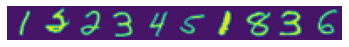

Precisión: 96.48 %


In [9]:
regresion_logistica_multi_clase('ex3data1.mat', 0.1)